In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/saidsabri010/dataset/main/Concrete_Data_Yeh.csv')
X = df['coarseaggregate'].values.reshape(-1, 1)
y = df['csMPa'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
sc_X = StandardScaler()
sc_y = StandardScaler()
X = preprocessing.scale(X) 
y = preprocessing.scale(y) 

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [19]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 300, 500, 700, 1000],
              'gamma': [1, 0.1, 0.2, 0.01, 0.001, 0.0001],
              'kernel': ['rbf'],
              'epsilon': [0.2, 0.1],
              }
regressor = GridSearchCV(SVR(), param_grid, refit=True, verbose=0, n_jobs=-1)
regressor.fit(X, y)

c:\users\hp\.virtualenvs\ml-assignment-saidsabri010-v6yqoaq0\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 300, 500, 700, 1000],
                         'epsilon': [0.2, 0.1],
                         'gamma': [1, 0.1, 0.2, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [16]:
y_pred = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred) 

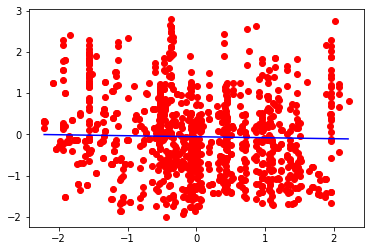

In [17]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.show()

In [18]:
regressor.score(X_test,y_test)

-4.542851445843151

In [11]:
fields = ['Score']
rows = [[1.0],
       [0.4654]]


In [12]:
filename = "Dt_modle_score.csv"


In [15]:
import csv
with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
    csvwriter.writerow(fields)
    csvwriter.writerow(rows)
data2 = pd.read_csv("Dt_modle_score.csv")